<a href="https://colab.research.google.com/github/JMCastle98/M4_Analisis_de_Datos_con_Python/blob/main/Postwork06/Postwork06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Postwork 6: Visualización de Datos Avanzada

En esta sección aplicamos maneras de visualizaion distintas como treemaps y binnings hexagonales para visualizar de mejor manera la relación entre clases primaria y secundaria y las variables que obtuvimos con mayor correlación en nuestro dataset.

In [ ]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_clean = pd.read_csv("https://raw.githubusercontent.com/JMCastle98/M4_Analisis_de_Datos_con_Python/main/Dataset/pok%C3%A9dex_clean.csv", index_col=0)

In [ ]:
df_clean.head()

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate
0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,318,45,49,49,65,65,45,45.0,Medium Slow
1,2,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,405,60,62,63,80,80,60,45.0,Medium Slow
2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,525,80,82,83,100,100,80,45.0,Medium Slow
3,3,Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,625,80,100,123,122,120,80,45.0,Medium Slow
4,4,Charmander,1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,309,39,52,43,60,50,65,45.0,Medium Slow


In [ ]:
df_grouped = df_clean.groupby('species')[['type_1', 'type_2']].max()

df_grouped.head()

,type_1,type_2
species,,
Abundance Pokémon,Ground,Flying
Acorn Pokémon,Grass,None
Alloy Pokémon,Steel,Dragon
Alpha Pokémon,Normal,None
Angler Pokémon,Water,Electric


Para poder crear el treemap creamos un nuevo dataset en el que agrupamos nuestros pokémon por especie para poder mostrar de manera gráfica aquellos que tienen más de un tipo y sus relaciones.


In [ ]:
df_grouped['count'] = 1

df_grouped.head()

,type_1,type_2,count
species,,,
Abundance Pokémon,Ground,Flying,1
Acorn Pokémon,Grass,None,1
Alloy Pokémon,Steel,Dragon,1
Alpha Pokémon,Normal,None,1
Angler Pokémon,Water,Electric,1


Actualizamos el paquete plotly en google colab:

In [ ]:
pip install --upgrade plotly

Obtenemos el siguiente treemap el cual nos ayuda a confirmar que los tipos "Water" y "Normal" son los que se encuentran en mayor cantidad como pudimos ver en la Exploración de variables categóricas, pero aqui podemos ver claramente con que tipo secundario se conbinan o si no cuentan con un secundario.

In [ ]:
fig = px.treemap(df_grouped, path =['type_1', 'type_2'], values='count')
fig.show()

A partir de la matriz de correlación de la sección de identificación de variables númericas, se obtuvieron los 5 pares de variables con mayor correlación, las cuales son:

        1.- height_m  -- weight_kg    coef_corr = 0.65
        2.- defense   -- sp_defense   coef_corr = 0.53
        3.- sp_attack -- sp_defense   coef_corr = 0.51
        4.- attack    -- defense      coef_corr = 0.46
        5.- weight_kg -- hp           coef_corr = 0.45



In [ ]:
df_numerico = df_clean[["height_m","weight_kg","total_points","hp","attack","defense","sp_attack","sp_defense","speed"]]
df_numerico = df_numerico[df_numerico['weight_kg']!=df_numerico['weight_kg'].max()]

In [ ]:
df_numerico.head()

,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,0.7,6.9,318,45,49,49,65,65,45
1,1.0,13.0,405,60,62,63,80,80,60
2,2.0,100.0,525,80,82,83,100,100,80
3,2.4,155.5,625,80,100,123,122,120,80
4,0.6,8.5,309,39,52,43,60,50,65


Para poder mostrar de una manera más clara las densidades entre estas variables utilizamos binning hexagonales y como se puede ver en las siguientes gráficas la densidad es más clara en estas que en las graficas scatter plot mostradas en la sección de regresión lineal.

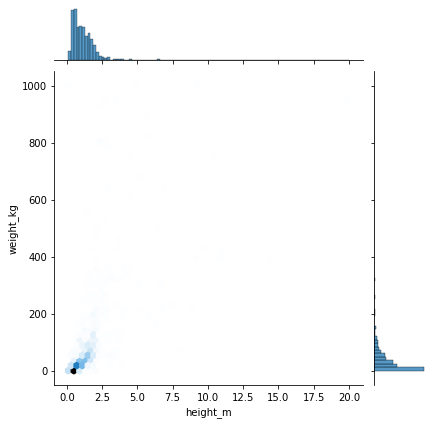

In [ ]:
sns.jointplot(x = 'height_m', y = 'weight_kg', data=df_numerico, kind='hex', ratio=5, joint_kws={'gridsize': 50});

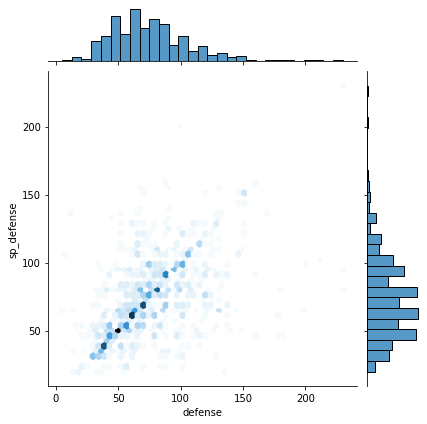

In [ ]:
sns.jointplot(x = 'defense', y=  'sp_defense', data=df_numerico, kind='hex', ratio=5, joint_kws={'gridsize': 50});

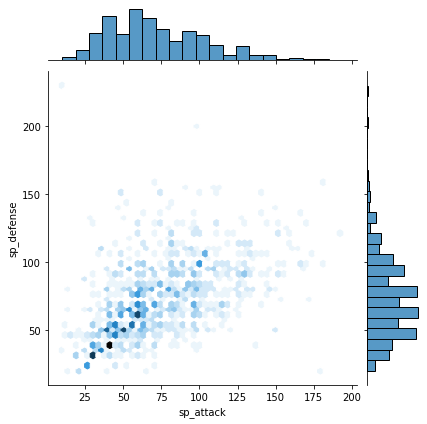

In [ ]:
sns.jointplot( x = 'sp_attack', y = 'sp_defense', data=df_numerico, kind='hex', ratio=5, joint_kws={'gridsize': 50});

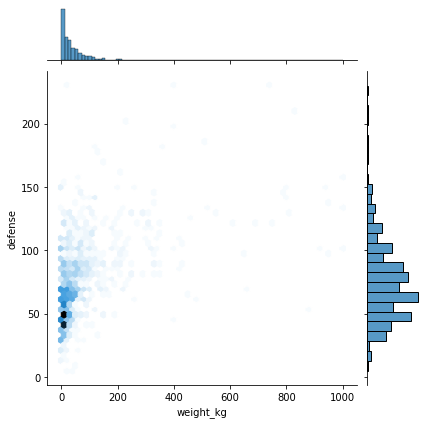

In [ ]:
sns.jointplot( x = 'weight_kg', y =  'defense', data=df_numerico, kind='hex', ratio=5, joint_kws={'gridsize': 50});

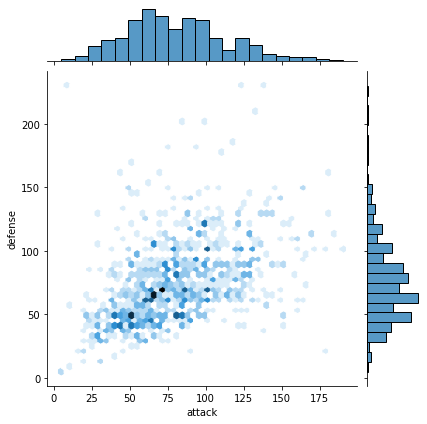

In [ ]:
sns.jointplot(x = 'attack', y = 'defense', data=df_numerico, kind='hex', ratio=5, joint_kws={'gridsize': 50});

Con esto solo podemos confirmar que las variables que presentan relaciones más altas son las estadísticas pokémon, las características fisiológicas de estos suelen ser extremas o en algunos casos algo ilógicos, sin embargo estamos hablando de una franquicia de ficción por lo que no tiene mucho sentido darle muchas vueltas. Las variables estadísticas son entonces las más explotables y que puede definir mejor el potencial de un pokémon, aprovecharemos esto más adelante.